# Problem Statement


Variables	Description
InvoiceNo	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
Description	Product (item) name. Nominal
Quantity	The quantities of each product (item) per transaction. Numeric
InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated
UnitPrice	Unit price. Numeric, product price per unit in sterling
CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer
Country	Country name. Nominal, the name of the country where each customer resides

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
Dataset Description
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

#  Variables	Description
* InvoiceNo- Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
* StockCode-Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
* Description-Product (item) name. Nominal
* Quantity-The quantities of each product (item) per transaction. Numeric
* InvoiceDate-Invoice Date and time. Numeric, the day and time when each transaction was generated
* UnitPrice-Unit price. Numeric, product price per unit in sterling
* CustomerID-Customer number. Nominal, a six digit integral number uniquely assigned to each customer
* Country	Country name. Nominal, the name of the country where each customer resides

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image as PILImage
from operator import attrgetter
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('C:/Users/vipul/Downloads/Project 3/Online Retail.xlsx')

In [3]:
Rows,Columns = df.shape
print('Data frame has {} rows and {} columns'.format(Rows,Columns))

Data frame has 541909 rows and 8 columns


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Dataset has 'Quantity' and 'UnitPrice' value starting from negative values which doesn't reallt make any sense. 
* Let's explore the data more and see how this could be managed.

In [7]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [8]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


### Checking Null values

In [9]:
df[df['Quantity']<0].isnull().sum()

InvoiceNo         0
StockCode         0
Description     862
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1719
Country           0
dtype: int64

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### As per the data definition the 'InvoiceNo' starting with 'C' means cancelled order and they are not required for the model

In [11]:
df[df['InvoiceNo'].str.startswith('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
df = df[~df['InvoiceNo'].str.startswith('C',na=False)]

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


#### Duplicate data check

In [14]:
df.duplicated().sum()

5231

In [15]:
df.drop_duplicates(inplace=True,keep = 'first')

In [16]:
df.duplicated().sum()

0

#### Handeling missing values

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134658
Country             0
dtype: int64

In [18]:
df[(df['Description'].isnull()) & (df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [19]:
df[(df['Description'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [20]:
df.dropna(subset=['CustomerID'],inplace=True)

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Now the data is clean from all negative values and null values. But the UnitPrice have some values zero values which again really don't make any sense.

In [22]:
df = df[df['UnitPrice']!=0]

In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
df.shape

(392692, 8)

Text(0.5, 1.0, 'No of Transaction per Country')

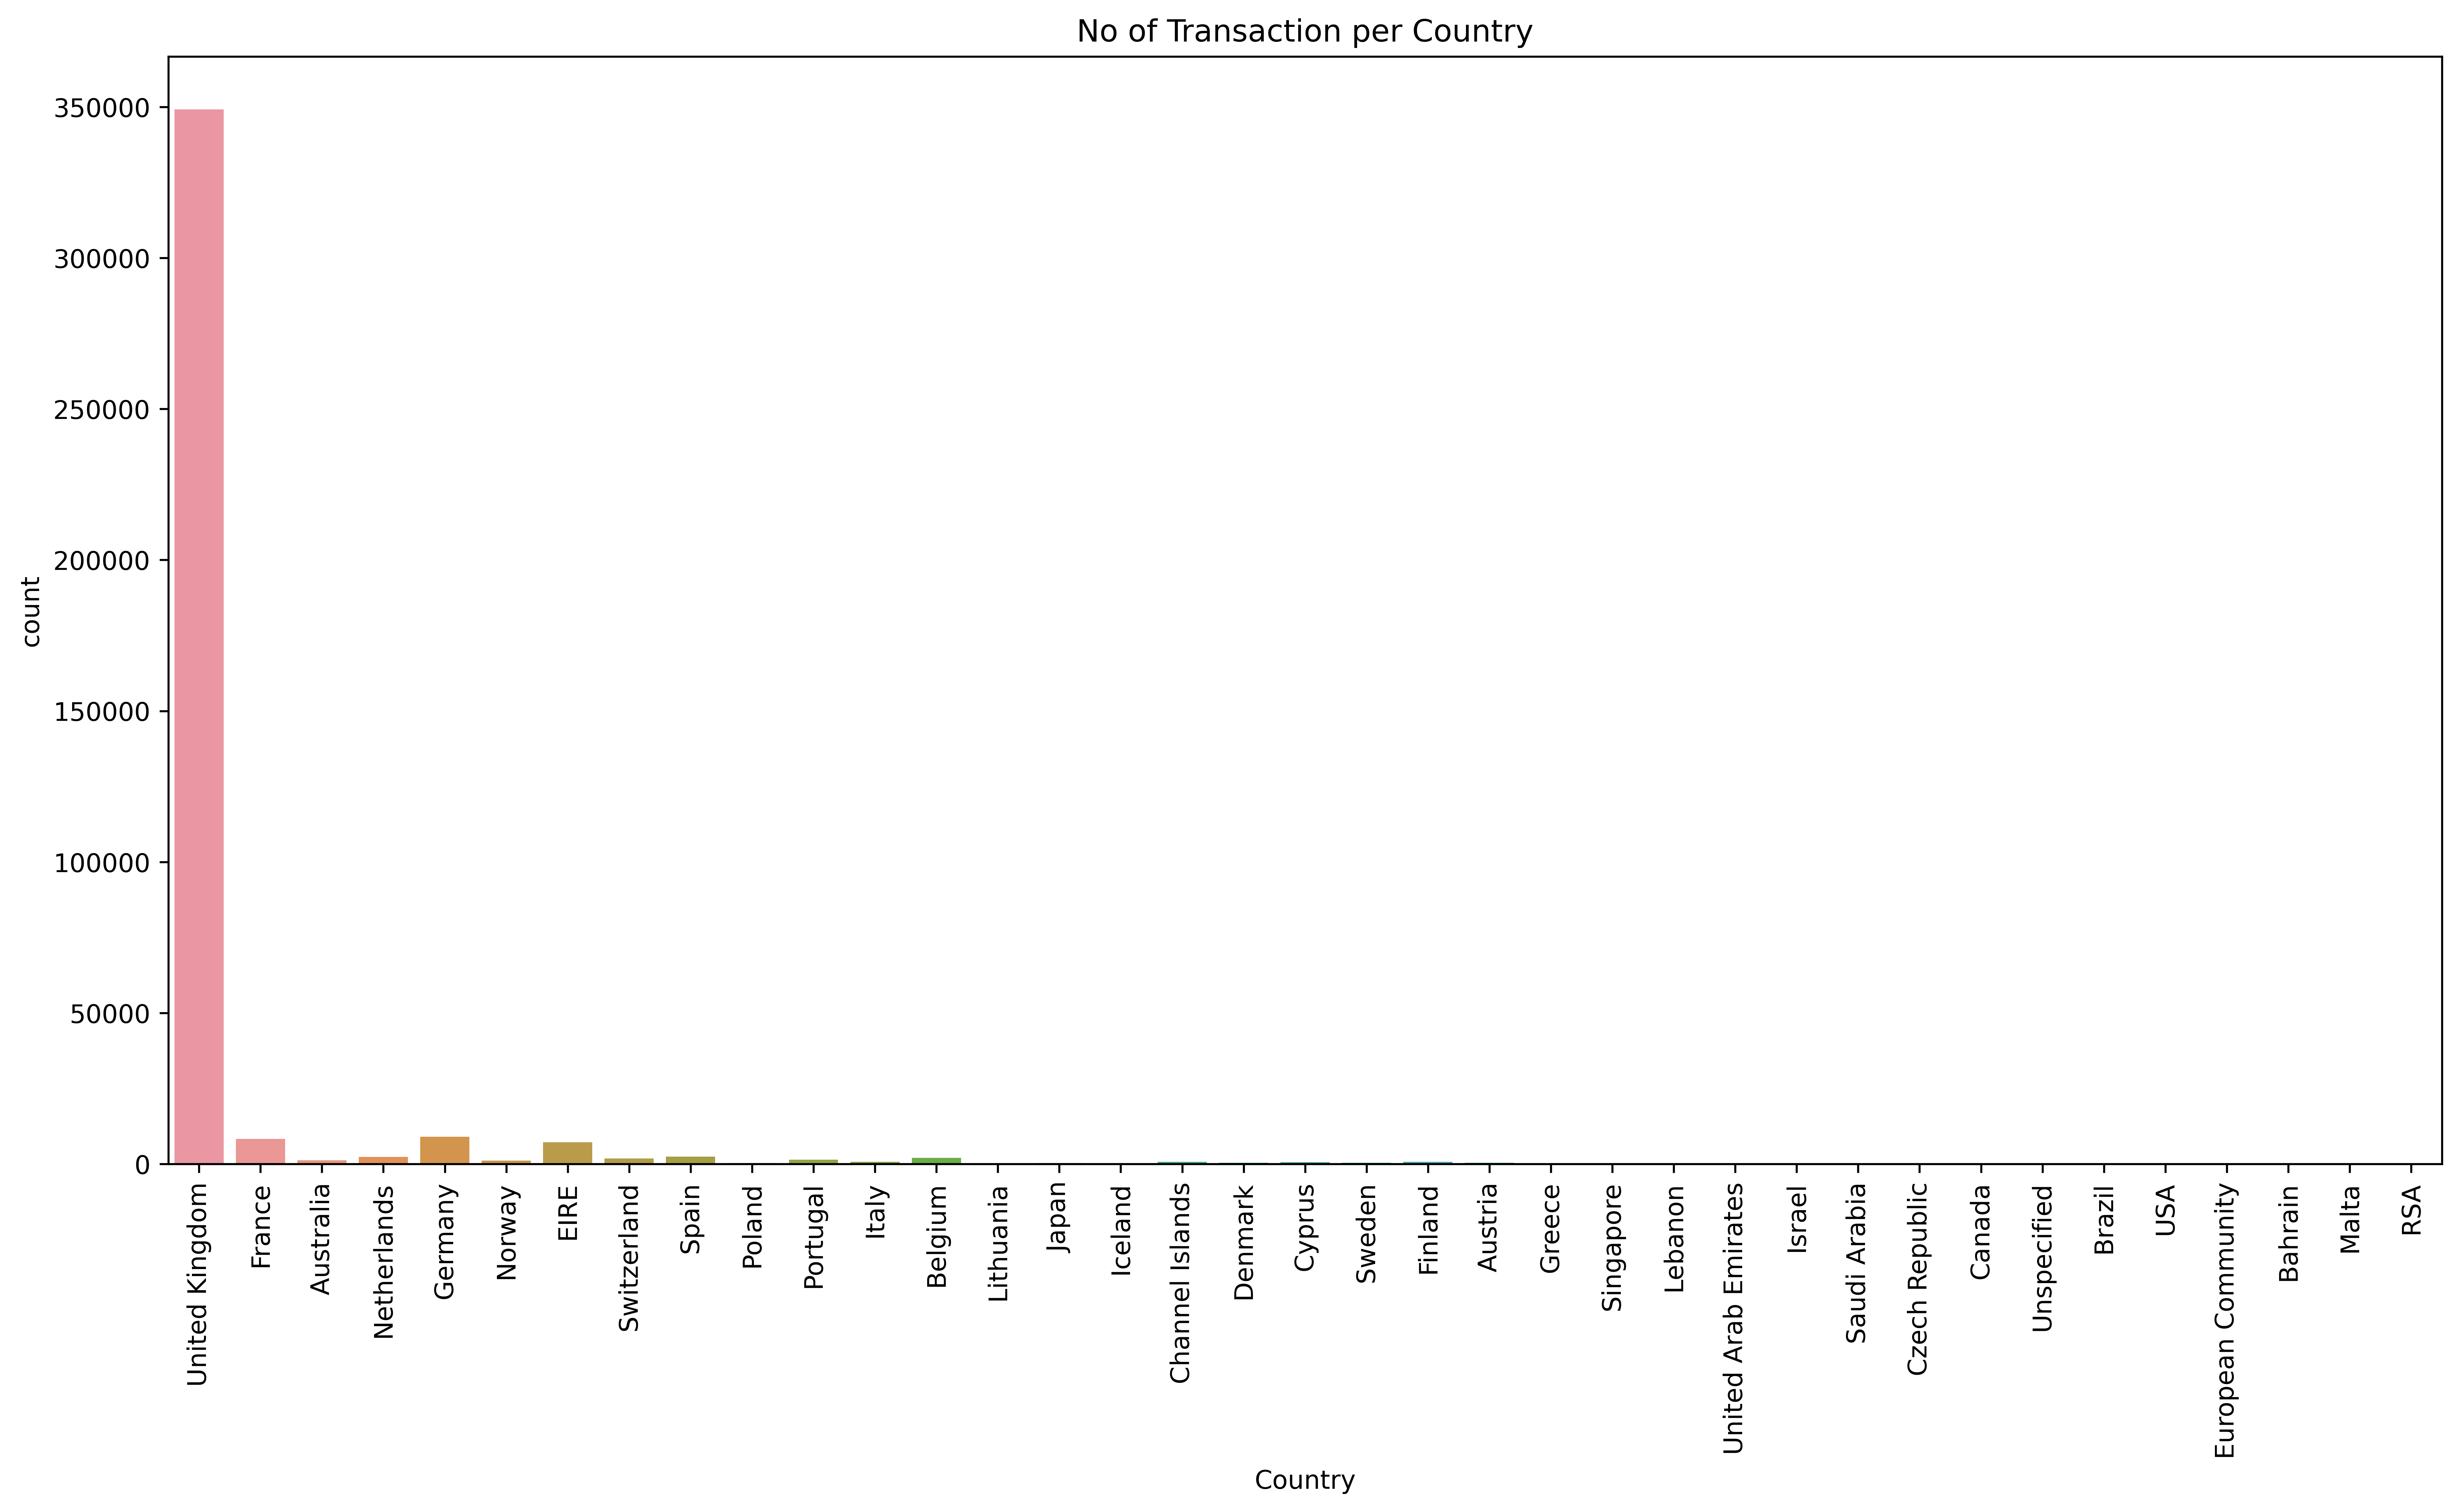

In [25]:
plt.figure(figsize=(16,8),dpi = 600)
sns.countplot(x = df['Country'])
plt.xticks(rotation = 90);
plt.title("No of Transaction per Country")

Text(0.5, 1.0, 'No of Transaction per Country')

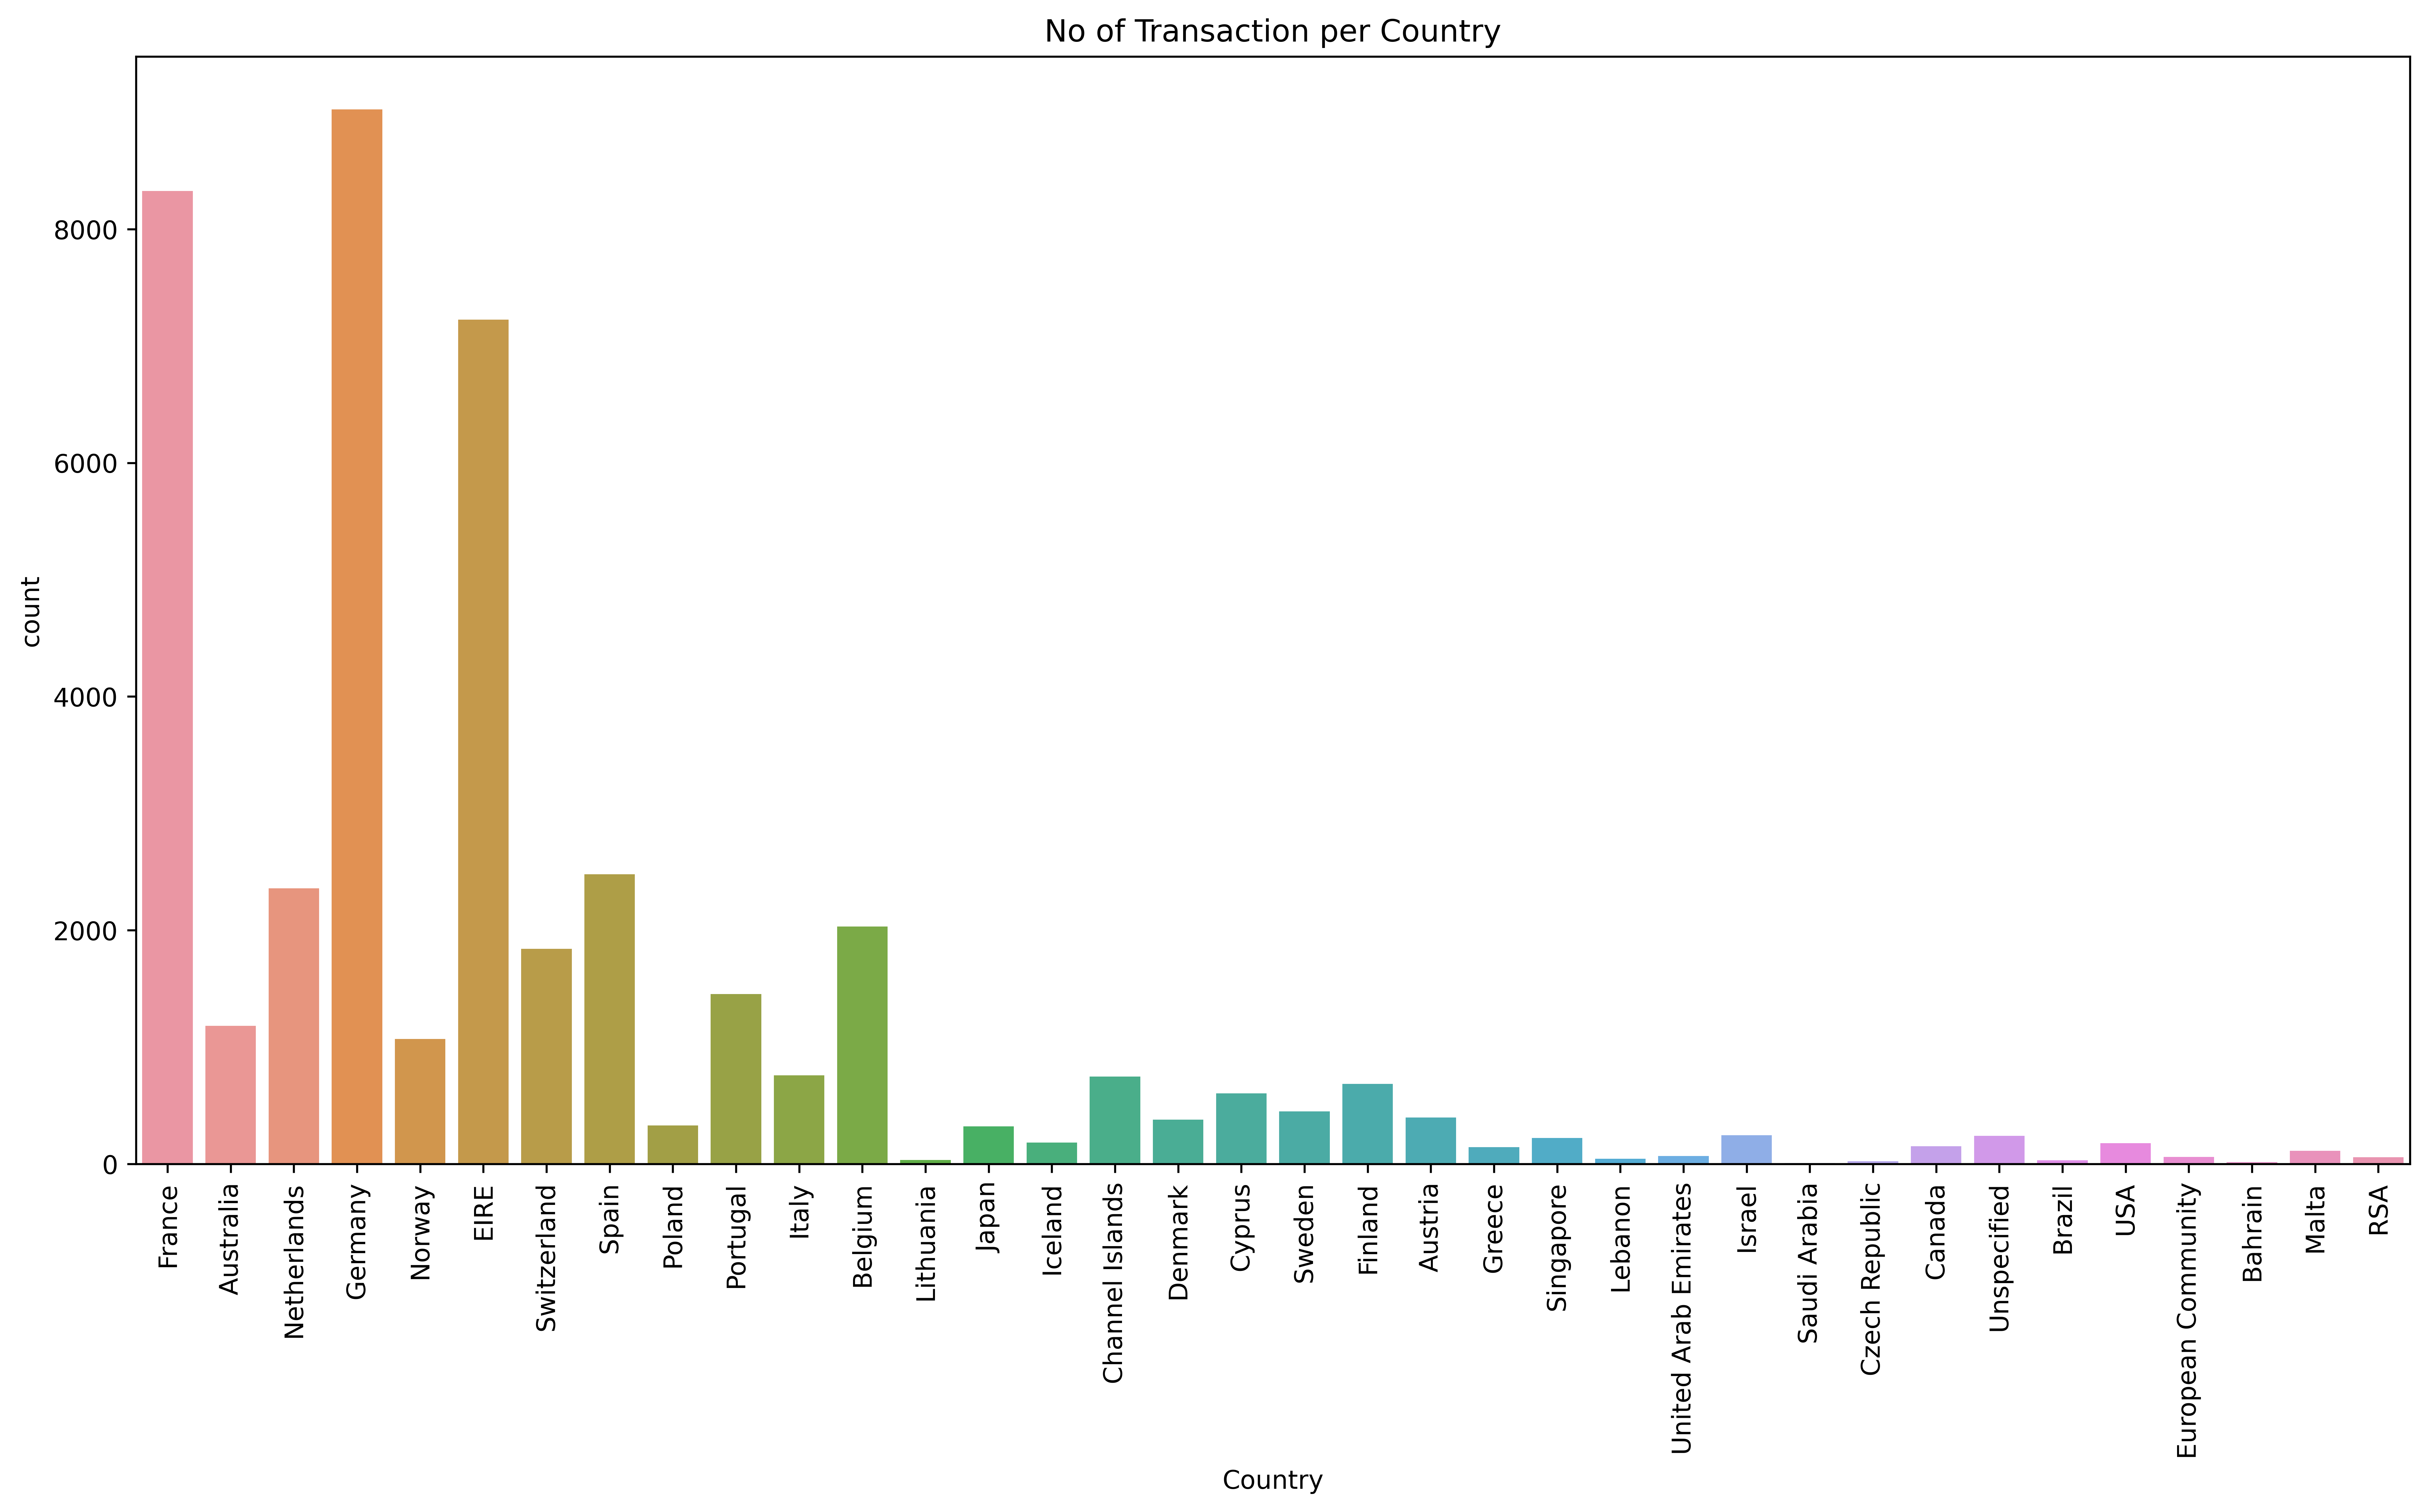

In [26]:
plt.figure(figsize=(16,8),dpi = 600)
sns.countplot(x = df[df['Country']!='United Kingdom']['Country'])
plt.xticks(rotation = 90);
plt.title("No of Transaction per Country")

In [27]:
df.groupby(['Country'])['Quantity'].sum().sort_values()

Country
Saudi Arabia                 80
Bahrain                     260
RSA                         351
Brazil                      356
Lebanon                     386
European Community          499
Lithuania                   652
Czech Republic              671
Malta                       970
United Arab Emirates        982
Greece                     1557
Unspecified                1785
USA                        2458
Iceland                    2458
Canada                     2763
Poland                     3684
Israel                     4043
Austria                    4881
Singapore                  5241
Cyprus                     6340
Italy                      8112
Denmark                    8235
Channel Islands            9485
Finland                   10704
Portugal                  16095
Norway                    19336
Belgium                   23237
Japan                     26016
Spain                     27933
Switzerland               30082
Sweden                    36078


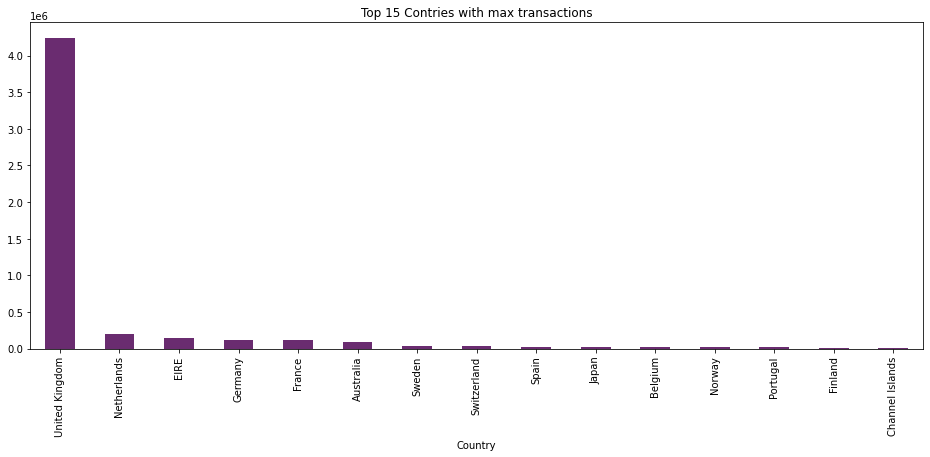

In [28]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar',color='#6a2c70',figsize = (16,6));
plt.title('Top 15 Contries with max transactions');

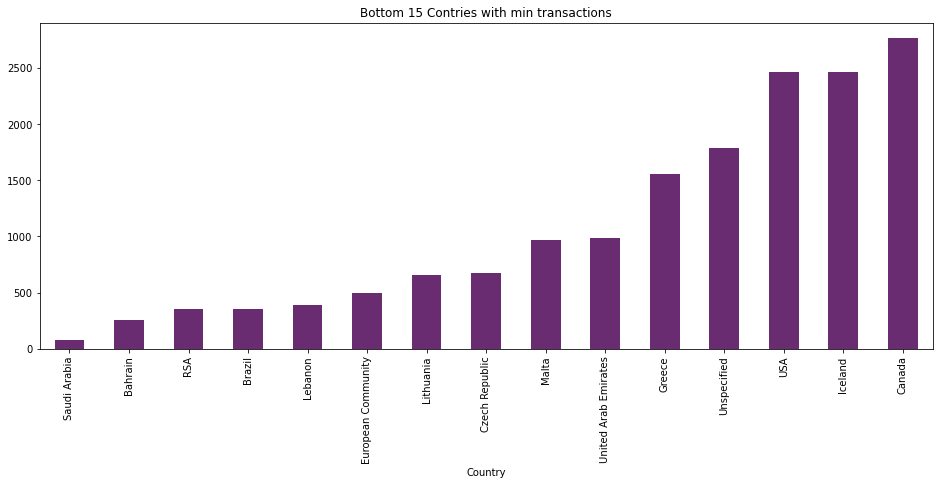

In [29]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending = True).head(15).plot(kind = 'bar',color='#6a2c70',figsize = (16,6));
plt.title('Bottom 15 Contries with min transactions');

In [30]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


Let's count the how many people have ordered multiple times and how many have ordered only once.

In [31]:
n_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
multi_order_percent = np.sum(n_orders>1)/len(df['CustomerID'].unique())
print( '{}% of people orderd more than once'.format((100*multi_order_percent).round(2)),'and {}% of people ordered just once'.format(100-(100*multi_order_percent).round(2)))

65.58% of people orderd more than once and 34.42% of people ordered just once


# Cohort Analysis

In [32]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M') 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08


In [33]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [34]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
...,...,...,...,...
86,2011-10,2011-11,86,1
87,2011-10,2011-12,41,2
88,2011-11,2011-11,323,0
89,2011-11,2011-12,36,1


In [35]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [36]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
  cohort_pivot.iloc[:,0]

cohort
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [38]:
cohort_pivot.divide(cohort_pivot.iloc[:,0], axis = 0)

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='period_number', ylabel='cohort'>

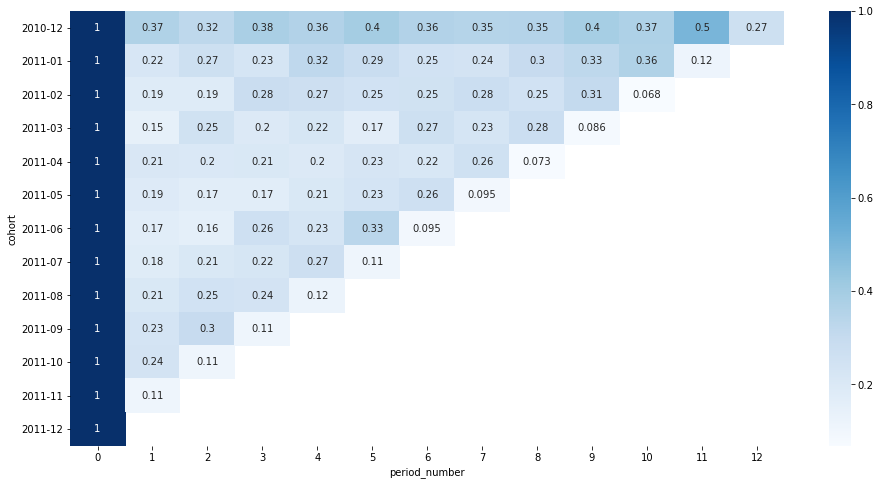

In [39]:
plt.figure(figsize = (16,8))
sns.heatmap(data =cohort_pivot.divide(cohort_pivot.iloc[:,0], axis = 0),annot=True,cmap="Blues")

In [40]:
df['Total Price'] = df['Quantity']*df['UnitPrice']

# Extract Recency, Frequency, Monetary (RFM) Metrics¶
Lets find out RFM values

* Recency: Number of days since a customer's last purchase

* Frequency: Number of purchases by the customer

* Monetary(Total Price): Total amount of money spent by the customer on his purchases

In [41]:
df_Monetary = df[['CustomerID','Total Price']].groupby("CustomerID", as_index=False)['Total Price'].sum()
df_Monetary

,CustomerID,Total Price
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [42]:
df_Frequency = df[['CustomerID','InvoiceNo']].groupby("CustomerID", as_index=False)['InvoiceNo'].count()
df_Frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [43]:
df_Last_Purchase = df[["CustomerID","InvoiceDate"]].groupby(['CustomerID'], as_index=False)['InvoiceDate'].max()
df_Last_Purchase

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4333,18280.0,2011-03-07 09:52:00
4334,18281.0,2011-06-12 10:53:00
4335,18282.0,2011-12-02 11:43:00
4336,18283.0,2011-12-06 12:02:00


In [44]:
df_Last_Purchase['InvoiceDate'] = pd.to_datetime(df_Last_Purchase['InvoiceDate'])

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [46]:
days_since_last_purchase = df['InvoiceDate'].max() - df_Last_Purchase['InvoiceDate'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4333   278 days 02:58:00
4334   181 days 01:57:00
4335     8 days 01:07:00
4336     4 days 00:48:00
4337    43 days 03:21:00
Name: InvoiceDate, Length: 4338, dtype: timedelta64[ns]

In [47]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [48]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase])
time_diff_in_days

0       326
1         2
2        75
3        19
4       310
       ... 
4333    278
4334    181
4335      8
4336      4
4337     43
Length: 4338, dtype: int64

In [49]:
df_final = pd.merge(df_Monetary, df_Frequency, on="CustomerID")
df_final['Recency'] = time_diff_in_days
df_final.rename(columns={"Total Price": "Monetary", "InvoiceNo": "Frequency"}, inplace=True)
df_final

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
...,...,...,...,...
4333,18280.0,180.60,10,278
4334,18281.0,80.82,7,181
4335,18282.0,178.05,12,8
4336,18283.0,2045.53,721,4


In [50]:
df_final['R Score'] = pd.qcut(df_final['Recency'], 4, ['4','3','2','1'])
df_final['F Score'] = pd.qcut(df_final['Frequency'], 4, ['1','2','3','4'])
df_final['M Score'] = pd.qcut(df_final['Monetary'], 4, ['1','2','3','4'])

df_final

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score
0,12346.0,77183.60,1,326,1,1,4
1,12347.0,4310.00,182,2,4,4,4
2,12348.0,1797.24,31,75,2,2,4
3,12349.0,1757.55,73,19,3,3,4
4,12350.0,334.40,17,310,1,1,2
...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,278,1,1,1
4334,18281.0,80.82,7,181,1,1,1
4335,18282.0,178.05,12,8,4,1,1
4336,18283.0,2045.53,721,4,4,4,4


In [51]:
df_final['RFM Segment'] = df_final['R Score'].astype(str) + df_final['F Score'].astype(str) + df_final['M Score'].astype(str)

In [52]:
df_final

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score,RFM Segment
0,12346.0,77183.60,1,326,1,1,4,114
1,12347.0,4310.00,182,2,4,4,4,444
2,12348.0,1797.24,31,75,2,2,4,224
3,12349.0,1757.55,73,19,3,3,4,334
4,12350.0,334.40,17,310,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,278,1,1,1,111
4334,18281.0,80.82,7,181,1,1,1,111
4335,18282.0,178.05,12,8,4,1,1,411
4336,18283.0,2045.53,721,4,4,4,4,444


In [53]:
df_final[df_final['RFM Segment']=='144']

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score,RFM Segment
31,12383.0,1850.560,99,185,1,4,4,144
123,12501.0,2169.390,149,337,1,4,4,144
263,12669.0,2744.030,101,151,1,4,4,144
390,12840.0,2726.770,113,144,1,4,4,144
566,13093.0,7832.470,159,276,1,4,4,144
1185,13952.0,3251.071,137,218,1,4,4,144
1230,14016.0,4341.210,161,162,1,4,4,144
1399,14245.0,1693.450,108,220,1,4,4,144
1550,14461.0,2103.060,180,148,1,4,4,144
2118,15235.0,2247.510,143,218,1,4,4,144


In [54]:
df_final['RFM Score'] = df_final['R Score'].astype(int) + df_final['F Score'].astype(int) + df_final['M Score'].astype(int)

In [55]:
df_final

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score,RFM Segment,RFM Score
0,12346.0,77183.60,1,326,1,1,4,114,6
1,12347.0,4310.00,182,2,4,4,4,444,12
2,12348.0,1797.24,31,75,2,2,4,224,8
3,12349.0,1757.55,73,19,3,3,4,334,10
4,12350.0,334.40,17,310,1,1,2,112,4
...,...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,278,1,1,1,111,3
4334,18281.0,80.82,7,181,1,1,1,111,3
4335,18282.0,178.05,12,8,4,1,1,411,6
4336,18283.0,2045.53,721,4,4,4,4,444,12


In [56]:
df_final['RFM Level'] = pd.qcut(df_final['RFM Score'],4,labels = ('Bronze','Silver','Gold','Platinum'))

In [57]:
df_final

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score,RFM Segment,RFM Score,RFM Level
0,12346.0,77183.60,1,326,1,1,4,114,6,Silver
1,12347.0,4310.00,182,2,4,4,4,444,12,Platinum
2,12348.0,1797.24,31,75,2,2,4,224,8,Gold
3,12349.0,1757.55,73,19,3,3,4,334,10,Gold
4,12350.0,334.40,17,310,1,1,2,112,4,Bronze
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,278,1,1,1,111,3,Bronze
4334,18281.0,80.82,7,181,1,1,1,111,3,Bronze
4335,18282.0,178.05,12,8,4,1,1,411,6,Silver
4336,18283.0,2045.53,721,4,4,4,4,444,12,Platinum


In [58]:
# df_final['RFM Score'].value_counts()

#### Plotting recency, frequency and monetary values to check the skewness in data

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

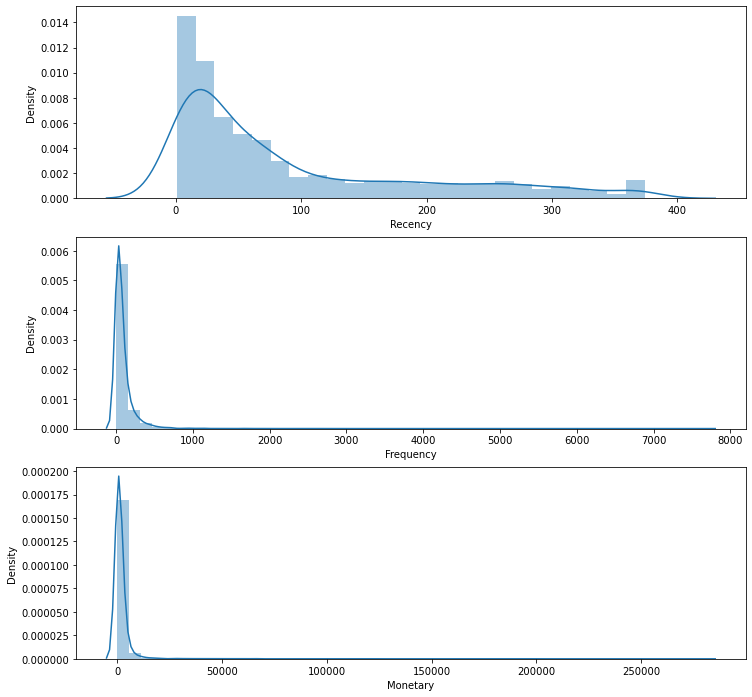

In [59]:
fig,axes = plt.subplots(nrows = 3,ncols = 1,figsize =(12,12))
axes1 = axes[0]
axes2 = axes[1]
axes3 = axes[2]
sns.distplot(df_final['Recency'],ax=axes1)
sns.distplot(df_final['Frequency'],ax=axes2)
sns.distplot(df_final['Monetary'],ax=axes3)

###### To fix the skewness in the data we'll do log transformation.

In [60]:
df_log = df_final.copy()

In [61]:
df_log = df_log[['Recency','Frequency','Monetary']].apply(np.log,axis=1)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

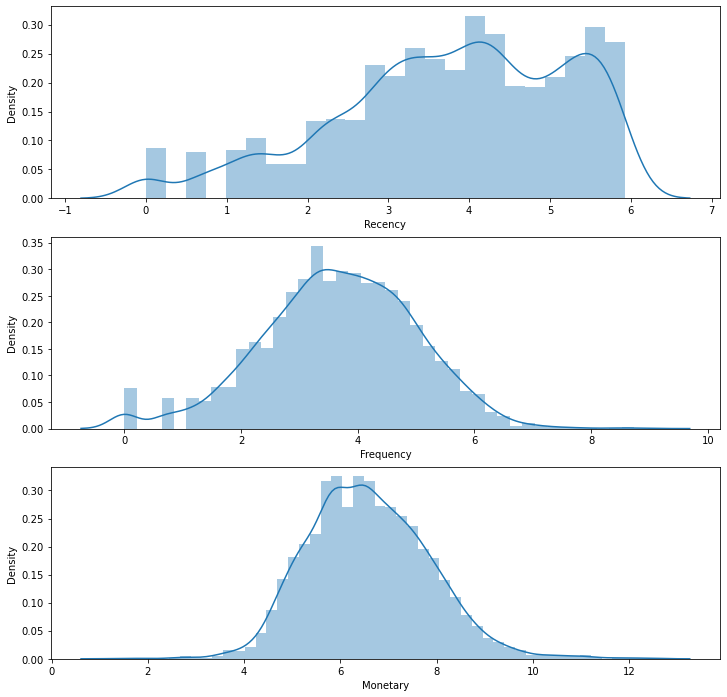

In [62]:
fig,axes = plt.subplots(nrows = 3,ncols = 1,figsize =(12,12))
axes1 = axes[0]
axes2 = axes[1]
axes3 = axes[2]
sns.distplot(df_log['Recency'],ax=axes1)
sns.distplot(df_log['Frequency'],ax=axes2)
sns.distplot(df_log['Monetary'],ax=axes3)

#### Let's Standardize the data to bring the data at the same scale.

In [63]:
scaler = StandardScaler()

In [64]:
df_log_scaled = scaler.fit_transform(df_log)

# Model Building

In [65]:
ssd = []

for k in range(1,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(df_log_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    


Text(0, 0.5, 'Inertia')

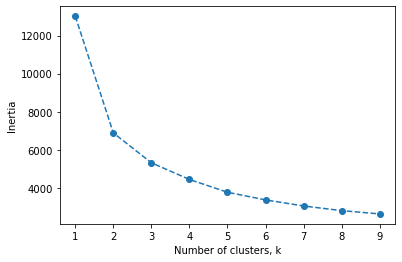

In [66]:
plt.plot(range(1,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.style.use('ggplot')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')

In [67]:
ssd

[13014.000000000002,
 6883.679444650629,
 5314.619000863782,
 4440.186305838019,
 3766.384321223561,
 3366.8491936076134,
 3046.7406605841243,
 2802.375185164407,
 2629.6361801308053]

In [68]:
pd.Series(ssd).diff()

0            NaN
1   -6130.320555
2   -1569.060444
3    -874.432695
4    -673.801985
5    -399.535128
6    -320.108533
7    -244.365475
8    -172.739005
dtype: float64

<AxesSubplot:>

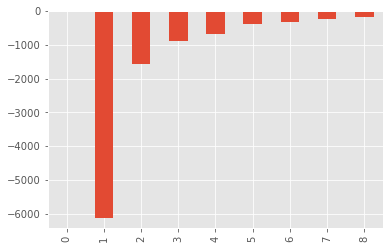

In [69]:
pd.Series(ssd).diff().plot(kind = 'bar')

It could be concluded from above three plots that the best results could be found with 4 clusters. So we'll take n_clusters = 4 for final model.

In [70]:
final_model = KMeans(n_clusters=4)

In [71]:
final_model.fit(df_log_scaled)

KMeans(n_clusters=4)

In [72]:
labels = final_model.labels_

In [73]:
rfm_ = df_final.assign(K_Cluster = labels)

In [74]:
rfm_['K_Cluster'].unique()

array([3, 1, 0, 2])

In [75]:
rfm_.groupby('K_Cluster')[['Monetary','Frequency','Recency']].count()

,Monetary,Frequency,Recency
K_Cluster,,,
0,1378,1378,1378
1,836,836,836
2,832,832,832
3,1292,1292,1292


In [76]:
rfm_['K_Cluster'] = rfm_['K_Cluster']+1

In [77]:
rfm_

,CustomerID,Monetary,Frequency,Recency,R Score,F Score,M Score,RFM Segment,RFM Score,RFM Level,K_Cluster
0,12346.0,77183.60,1,326,1,1,4,114,6,Silver,4
1,12347.0,4310.00,182,2,4,4,4,444,12,Platinum,2
2,12348.0,1797.24,31,75,2,2,4,224,8,Gold,4
3,12349.0,1757.55,73,19,3,3,4,334,10,Gold,4
4,12350.0,334.40,17,310,1,1,2,112,4,Bronze,1
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,278,1,1,1,111,3,Bronze,1
4334,18281.0,80.82,7,181,1,1,1,111,3,Bronze,1
4335,18282.0,178.05,12,8,4,1,1,411,6,Silver,3
4336,18283.0,2045.53,721,4,4,4,4,444,12,Platinum,2


In [81]:
# assign cluster column
df_log_scaled = pd.DataFrame(df_log_scaled, columns=['Monetary','Frequency','Recency'])
df_log_scaled['K_Cluster'] = model.labels_
df_log_scaled['RFM_Level'] = df_final['RFM Level']
df_log_scaled.reset_index(inplace = True)
 
# melt the dataframe
rfm_melted = pd.melt(frame= df_log_scaled, id_vars= ['RFM_Level', 'K_Cluster'], var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,RFM_Level,K_Cluster,Metrics,Value
0,Silver,5,index,0.0
1,Platinum,8,index,1.0
2,Gold,5,index,2.0
3,Gold,7,index,3.0
4,Bronze,1,index,4.0


In [82]:
df_final.iloc[:, 1:4].mean()

Monetary     2048.688081
Frequency      90.523744
Recency        92.536422
dtype: float64

In [83]:
df_final.groupby('RFM Level').mean().iloc[:, 1:4]

,Monetary,Frequency,Recency
RFM Level,,,
Bronze,266.505704,15.060606,192.165501
Silver,789.257001,32.959783,87.686957
Gold,1597.725141,81.236476,47.848532
Platinum,6870.541553,284.188769,13.761051


In [84]:
df_final.groupby('RFM Level').mean().iloc[:, 1:4]/df_final.iloc[:, 1:4].mean()

,Monetary,Frequency,Recency
RFM Level,,,
Bronze,0.130086,0.166372,2.076647
Silver,0.385250,0.364101,0.947594
Gold,0.779877,0.897405,0.517078
Platinum,3.353630,3.139384,0.148710


In [85]:
# the mean value in total
total_avg = df_final.iloc[:, 1:4].mean()
total_avg

# calculate the proportional gap with total mean
cluster_avg = df_final.groupby('RFM Level').mean().iloc[:, 1:4]
prop_rfm = cluster_avg/total_avg - 1

# calculate the proportional gap with total mean
cluster_avg_K = rfm_.groupby('K_Cluster').mean().iloc[:, 1:4]
prop_rfm_K = cluster_avg_K/total_avg - 1

[]

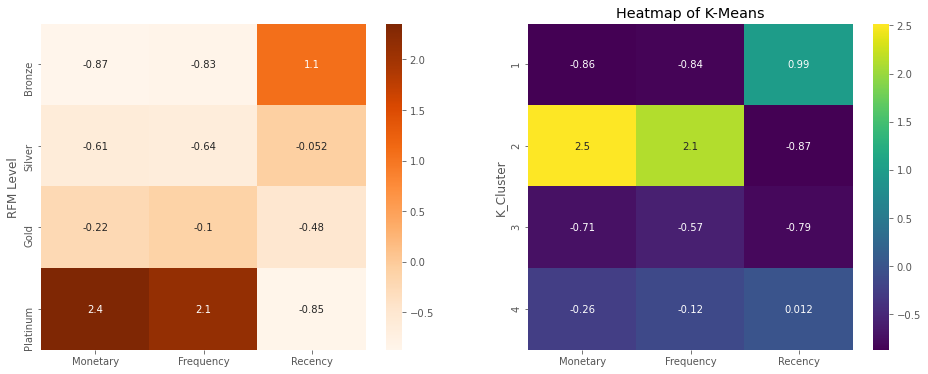

In [86]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (16,6))

ax1 = ax[0]
ax2 = ax[1]


sns.heatmap(prop_rfm, cmap= 'Oranges',  annot = True,ax=ax1)
plt.title('Heatmap of RFM quantile')
plt.plot()

sns.heatmap(prop_rfm_K, cmap= 'viridis', annot = True,ax=ax2)
plt.title('Heatmap of K-Means')
plt.plot()

From the values above in each box it could be concluded that the green group corresponds to group 2 and from the given dataset we made two metrics one using RFM segmentation and one from K-Means and found that the customers belonging to Green category are the most profitable customers and those are the same customers from grouo 2.

# Tableau Visualization

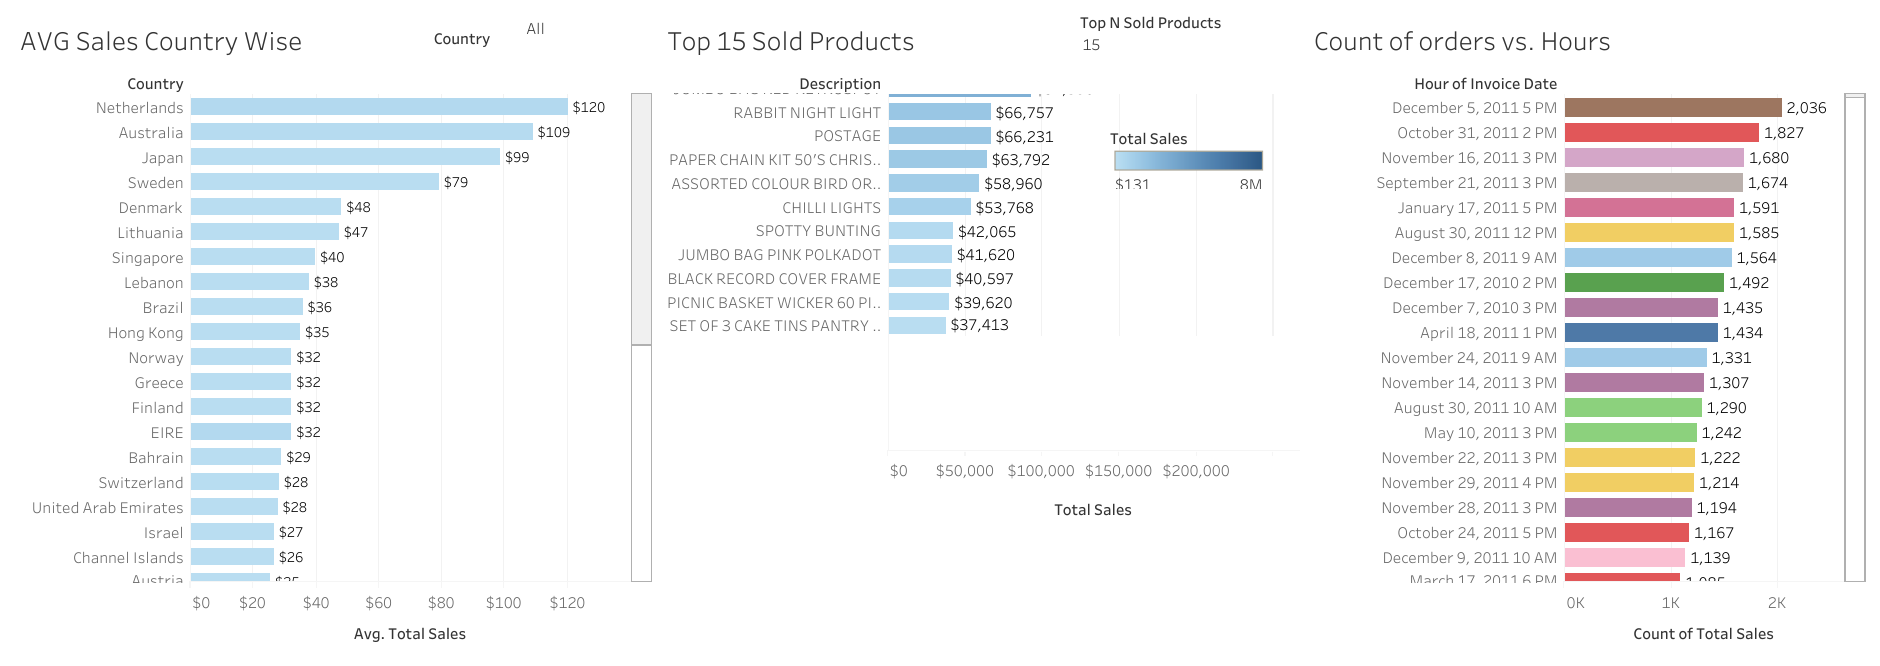

In [88]:
image1 = PILImage.open('C:/Users/vipul/ML project 1/Tableau Dashboard/Retail/Retail Dashborad (1).png') 
image1

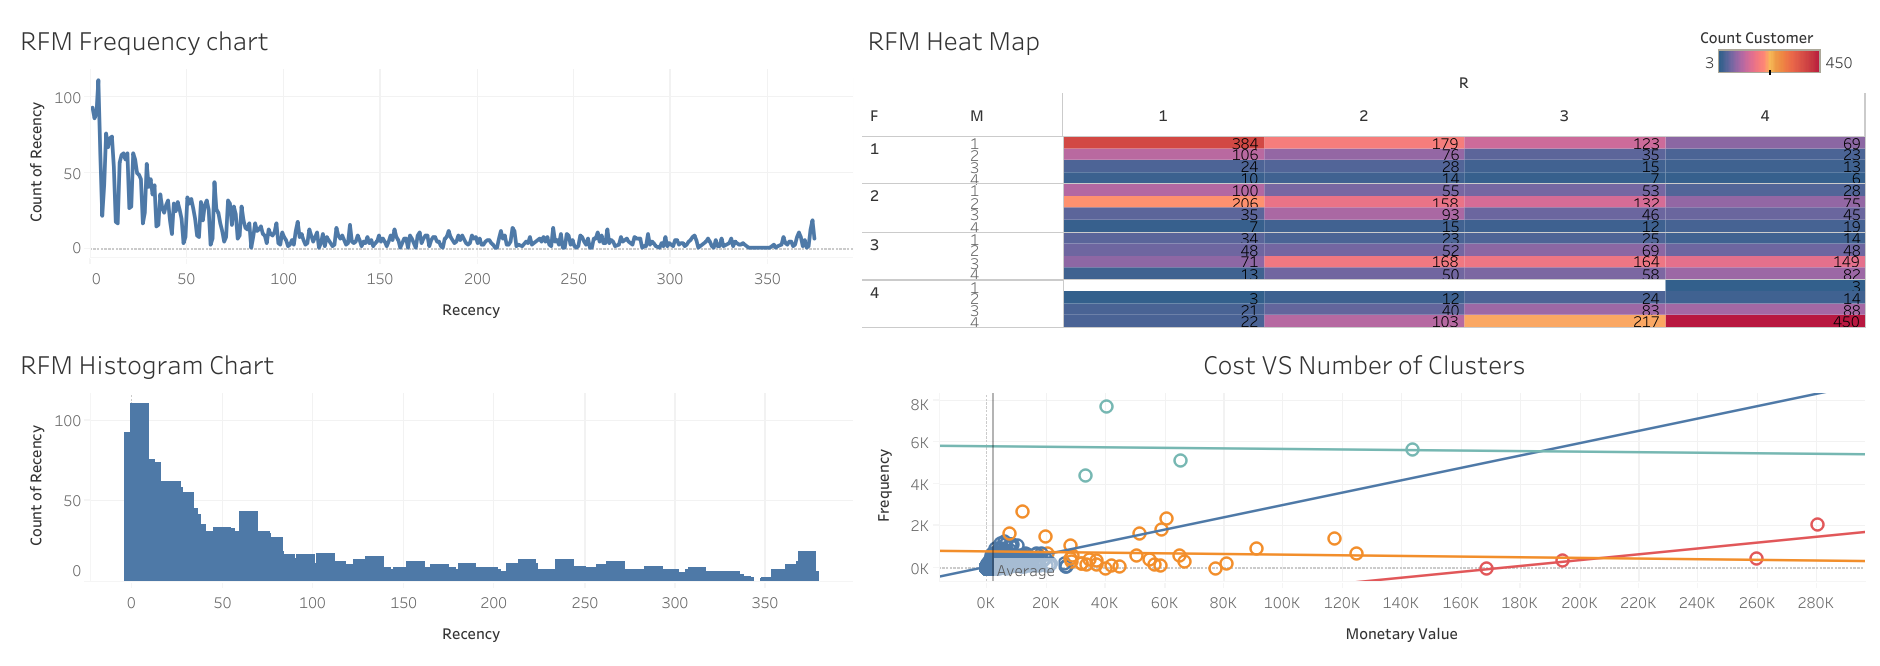

In [89]:
image2 = PILImage.open('C:/Users/vipul/ML project 1/Tableau Dashboard/Retail/RFM Frequency and Histogram.png') 
image2